Optimal indices: [2, 3]
CNOTs counts: [68, 40, 28, 28, 44]


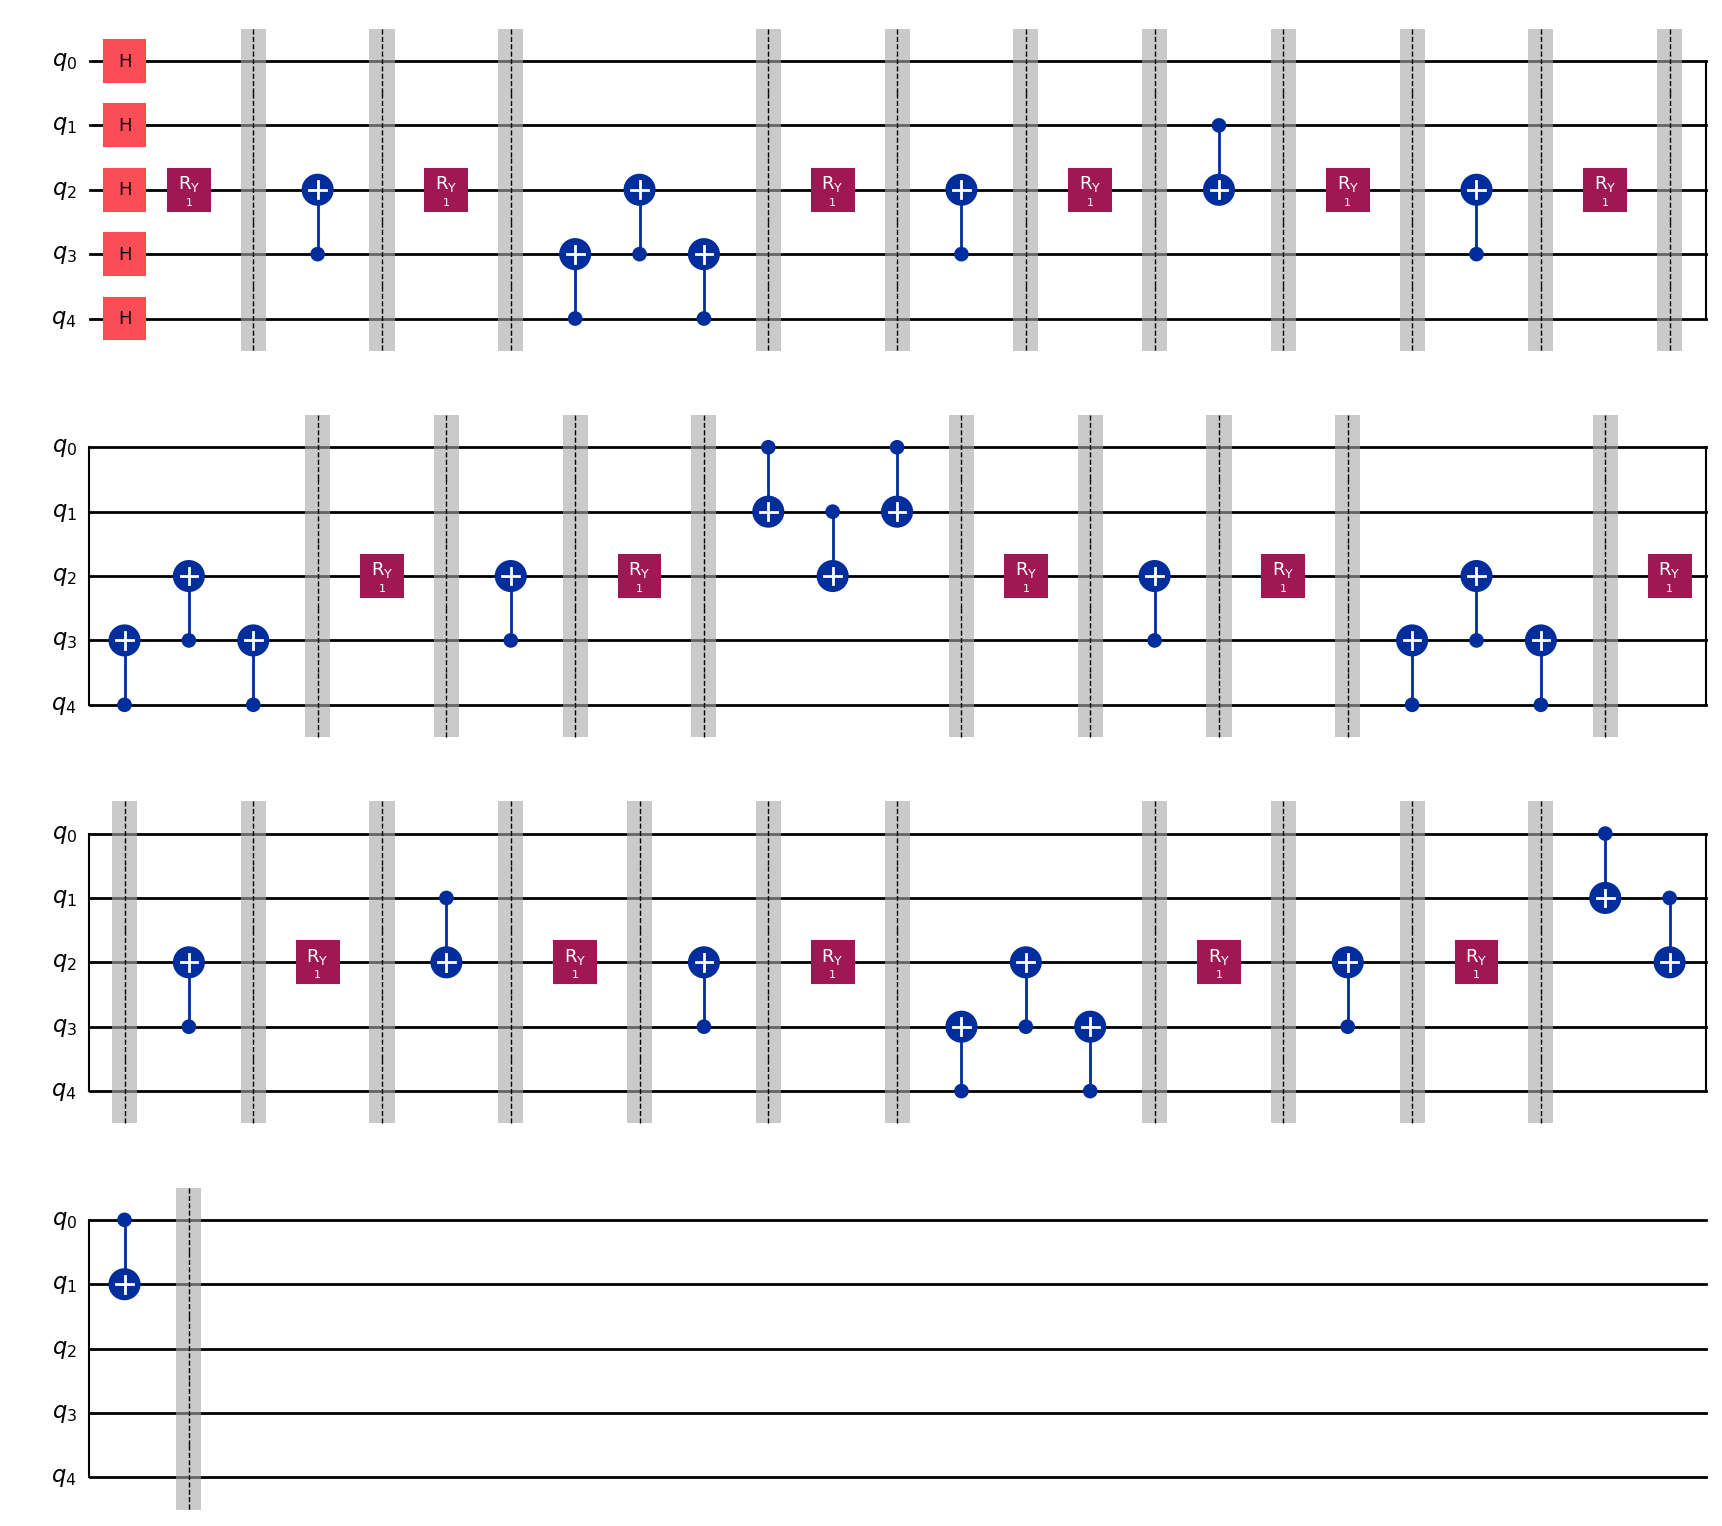

In [2]:
from circuit import get_quantum_circuit
from graph import floyd_warshall, get_matrix_from_edges, get_shortest_paths
from optimizer import optimize_cnots

num_qubits = 5
edges = [(0, 1), (1, 2), (2, 3), (3, 4)]

adj_matrix = get_matrix_from_edges(num_qubits, edges)
dist_matrix, aux_path_matrix = floyd_warshall(adj_matrix)
optimal_indices, cnots_counts = optimize_cnots(num_qubits, dist_matrix)
print(f"Optimal indices: {optimal_indices}")
print(f"CNOTs counts: {cnots_counts}")

target = optimal_indices[0]
params = [1.0] * (2**num_qubits)
path_matrix = get_shortest_paths(aux_path_matrix)
qc = get_quantum_circuit(target, num_qubits, params, path_matrix)


qc.draw("mpl")